## Model Building on Wine Quality Analysis: 

### Importing all the Necessary libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset:

In [2]:
df = pd.read_csv('Wine_Quality_Data.csv')
df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color,quality_category
0,6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,no,red,Medium Quality
1,7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,yes,red,High Quality
2,8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,yes,red,High Quality
3,9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,no,red,Medium Quality
4,18,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.50,9.0,4,no,red,Low Quality



## Data Preparation
- Train Test Split
- Encoding for Categorical Columns
   - Ordinal : LabelEncoding or OrdinalEncoding
   - Nominal : OneHotEncoding or get_dummies
- Encoding for Numerical Columns
   - Standardization (z-transformation)

We will be following below mentioned steps:

a. Identify the Target Variable and Splitting the Data into train and test
  
b. Separating Categorical and Numerical Columns

c. Rescaling Numerical Columns (Standardization or z-transformation)

d. Applying OneHotEncoding on Categorical Columns

e. Applying Label Encoding on Categorical Columns
  
f. Concatinating the Encoded Categorical Features and Scaled Numerical Features

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4151 entries, 0 to 4150
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4151 non-null   int64  
 1   fixed acidity         4151 non-null   float64
 2   volatile acidity      4151 non-null   float64
 3   citric acid           4151 non-null   float64
 4   residual sugar        4151 non-null   float64
 5   chlorides             4151 non-null   float64
 6   free sulfur dioxide   4151 non-null   float64
 7   total sulfur dioxide  4151 non-null   float64
 8   density               4151 non-null   float64
 9   pH                    4151 non-null   float64
 10  sulphates             4151 non-null   float64
 11  alcohol               4151 non-null   float64
 12  quality               4151 non-null   int64  
 13  good                  4151 non-null   object 
 14  color                 4151 non-null   object 
 15  quality_category     

In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
df.drop('quality_category', axis = 1, inplace = True)

In [6]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,no,red
1,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,yes,red
2,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,yes,red
3,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,no,red
4,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.0,4,no,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4146,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,no,white
4147,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,no,white
4148,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,no,white
4149,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,yes,white


In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good', 'color'],
      dtype='object')

In [8]:
import sklearn
print(sklearn.__version__)

1.7.2


In [9]:
### Identifying the X and Y Columns 

x = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates',	'alcohol', 'good', 'color']]
y = df['quality']

In [10]:
# split into train and test
# Here we split the data into 70% training - 30% testing ratio
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x ,y ,train_size=0.75, random_state =100)

In [11]:
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good,color
582,6.7,0.23,0.26,1.4,0.060,33.0,154.0,0.99340,3.24,0.56,9.5,no,white
1967,6.8,0.24,0.35,6.4,0.048,44.0,172.0,0.99440,3.29,0.55,10.5,yes,white
3149,6.7,0.28,0.31,7.4,0.041,7.0,81.0,0.99254,3.04,0.47,11.4,yes,white
237,7.2,0.62,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5,no,red
2458,6.2,0.27,0.18,1.5,0.028,20.0,111.0,0.99228,3.41,0.50,10.0,no,white


In [12]:
print(x_train.shape , y_train.shape) #For Training the model 75%
print(x_test.shape , y_test.shape) # for Testing The model 25%

(3113, 13) (3113,)
(1038, 13) (1038,)


In [13]:
# Here we have to split numerical and categorical features 
x_train.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
good                     object
color                    object
dtype: object

In [14]:
x_train_categorical = x_train.select_dtypes(include=["object"]) 
x_train_categorical.head()

,good,color
582,no,white
1967,yes,white
3149,yes,white
237,no,red
2458,no,white


In [15]:
x_train_numerical = x_train.select_dtypes(include=["int64" ,"float64"])

x_train_numerical.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
582,6.7,0.23,0.26,1.4,0.060,33.0,154.0,0.99340,3.24,0.56,9.5
1967,6.8,0.24,0.35,6.4,0.048,44.0,172.0,0.99440,3.29,0.55,10.5
3149,6.7,0.28,0.31,7.4,0.041,7.0,81.0,0.99254,3.04,0.47,11.4
237,7.2,0.62,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5
2458,6.2,0.27,0.18,1.5,0.028,20.0,111.0,0.99228,3.41,0.50,10.0


In [16]:
# Scale numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are(annoyingly) last after scaling
# (i.e, The DataFrame is converted to a numpy ndarray)
# While scaling, we are losing indexing, so for that, we use index = x_gtgrain_num.index
x_train_num_rescaled = pd.DataFrame(scaler.fit_transform(x_train_numerical) , columns= x_train_numerical.columns,
                                   index = x_train_numerical.index)

In [17]:
x_train_num_rescaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
582,-0.248832,-0.604754,-0.455980,-0.892456,0.943382,0.085712,0.596906,-0.190103,0.110462,0.504133,-0.948850
1967,-0.135152,-0.518548,0.269801,0.282494,0.122947,0.782621,0.955603,0.182753,0.428858,0.415172,-0.108301
3149,-0.248832,-0.173726,-0.052769,0.517483,-0.355641,-1.561527,-0.857808,-0.510759,-1.163122,-0.296519,0.648193
237,0.319566,2.757260,-2.068828,-0.586969,2.105665,-1.054685,-0.778098,1.323692,1.829800,0.326211,-0.948850
2458,-0.817230,-0.259932,-1.101119,-0.868957,-1.244446,-0.737908,-0.259981,-0.607702,1.193008,-0.029635,-0.528576


In [18]:
x_train_numerical.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000
mean,6.918889,0.300153,0.316544,5.197848,0.046202,31.647125,124.046258,0.993910,3.222653,0.503331,10.628846
std,0.879807,0.116021,0.124024,4.256186,0.014629,15.786520,50.189733,0.002682,0.157062,0.112426,1.189889
min,4.600000,0.080000,0.000000,0.600000,0.009000,2.000000,6.000000,0.987110,2.790000,0.220000,8.400000
25%,6.300000,0.220000,0.260000,1.700000,0.036000,20.000000,95.000000,0.991800,3.120000,0.420000,9.600000
50%,6.800000,0.280000,0.310000,3.300000,0.044000,30.000000,123.000000,0.993800,3.210000,0.490000,10.500000
75%,7.400000,0.350000,0.380000,7.900000,0.053000,42.000000,158.000000,0.995950,3.320000,0.570000,11.400000
max,9.600000,0.655000,1.660000,17.200000,0.087000,77.000000,366.500000,1.001700,3.900000,0.820000,14.200000


In [19]:
print("Number of Numerical Feature : ", scaler.n_features_in_)
print('*' * 60)
print("Mean of each column : ", scaler.mean_)
print('*' * 60)
print("Std of each column: ", np.sqrt(scaler.var_))
print('*' * 60)

Number of Numerical Feature :  11
************************************************************
Mean of each column :  [6.91888853e+00 3.00152586e-01 3.16543527e-01 5.19784774e+00
 4.62017347e-02 3.16471250e+01 1.24046258e+02 9.93909857e-01
 3.22265339e+00 5.03331192e-01 1.06288457e+01]
************************************************************
Std of each column:  [8.79665407e-01 1.16001903e-01 1.24004301e-01 4.25550250e+00
 1.46263815e-02 1.57839841e+01 5.01816707e+01 2.68200107e-03
 1.57037179e-01 1.12408374e-01 1.18969831e+00]
************************************************************



## Applying OneHotEncoding on Categorical Columns

In [20]:
x_train_categorical

,good,color
582,no,white
1967,yes,white
3149,yes,white
237,no,red
2458,no,white
...,...,...
802,no,white
1890,no,white
350,no,red
79,no,red


In [21]:
x_train_categorical["good"].value_counts(normalize = True)

good
no     0.791519
yes    0.208481
Name: proportion, dtype: float64

In [22]:
x_train_categorical["color"].value_counts(normalize = True)

color
white    0.868937
red      0.131063
Name: proportion, dtype: float64

In [23]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', sparse_output = False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

x_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(x_train_categorical),
                               columns=encoder_.get_feature_names_out(x_train_categorical.columns),
                               index = x_train_categorical.index)

In [24]:
x_train_cat_ohe.head()

,good_yes,color_white
582,0.0,1.0
1967,1.0,1.0
3149,1.0,1.0
237,0.0,0.0
2458,0.0,1.0


In [25]:
encoder_.categories_

[array(['no', 'yes'], dtype=object), array(['red', 'white'], dtype=object)]

In [26]:
# Concatinationg the Encoded Categorical Features and Rescaled Numerical Features:

x_train_transformed = pd.concat([x_train_num_rescaled, x_train_cat_ohe], axis = 1)
x_train_transformed

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good_yes,color_white
582,-0.248832,-0.604754,-0.455980,-0.892456,0.943382,0.085712,0.596906,-0.190103,0.110462,0.504133,-0.948850,0.0,1.0
1967,-0.135152,-0.518548,0.269801,0.282494,0.122947,0.782621,0.955603,0.182753,0.428858,0.415172,-0.108301,1.0,1.0
3149,-0.248832,-0.173726,-0.052769,0.517483,-0.355641,-1.561527,-0.857808,-0.510759,-1.163122,-0.296519,0.648193,1.0,1.0
237,0.319566,2.757260,-2.068828,-0.586969,2.105665,-1.054685,-0.778098,1.323692,1.829800,0.326211,-0.948850,0.0,0.0
2458,-0.817230,-0.259932,-1.101119,-0.868957,-1.244446,-0.737908,-0.259981,-0.607702,1.193008,-0.029635,-0.528576,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,-0.703550,-0.604754,-0.133411,-0.798460,-0.902597,-0.991329,-0.658532,-1.234100,0.365179,-0.919248,0.984413,0.0,1.0
1890,-0.930909,0.343507,-0.052769,1.598437,0.464795,0.909332,2.270824,1.413177,-0.398972,-0.207557,-1.705345,0.0,1.0
350,0.092207,-0.690959,-0.133411,-0.798460,1.285230,-0.991329,-2.073392,1.047778,2.466592,2.817128,-0.528576,0.0,0.0
79,1.456362,1.722794,0.269801,-0.539971,2.105665,-0.674552,0.058861,1.375892,0.046783,1.037901,-1.032905,0.0,0.0


In [27]:
# Prepare Test Data :

x_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good,color
3279,5.6,0.25,0.19,2.4,0.049,42.0,166.0,0.99200,3.25,0.43,10.4,no,white
3603,6.6,0.22,0.37,1.6,0.040,31.0,101.0,0.99009,3.15,0.66,12.0,no,white
593,6.0,0.19,0.26,12.4,0.048,50.0,147.0,0.99720,3.30,0.36,8.9,no,white
3601,6.0,0.19,0.26,1.4,0.039,30.0,104.0,0.98998,3.32,0.41,12.4,no,white
2009,6.6,0.35,0.29,14.4,0.044,54.0,177.0,0.99910,3.17,0.58,8.9,no,white


In [28]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1038 entries, 3279 to 1963
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1038 non-null   float64
 1   volatile acidity      1038 non-null   float64
 2   citric acid           1038 non-null   float64
 3   residual sugar        1038 non-null   float64
 4   chlorides             1038 non-null   float64
 5   free sulfur dioxide   1038 non-null   float64
 6   total sulfur dioxide  1038 non-null   float64
 7   density               1038 non-null   float64
 8   pH                    1038 non-null   float64
 9   sulphates             1038 non-null   float64
 10  alcohol               1038 non-null   float64
 11  good                  1038 non-null   object 
 12  color                 1038 non-null   object 
dtypes: float64(11), object(2)
memory usage: 113.5+ KB


In [29]:
x_test_cat = x_test.select_dtypes(include = ['object'])
x_test_cat.head() 

,good,color
3279,no,white
3603,no,white
593,no,white
3601,no,white
2009,no,white


In [30]:
x_test_num = x_test.select_dtypes(include = ['int64', 'float64'])
x_test_num.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3279,5.6,0.25,0.19,2.4,0.049,42.0,166.0,0.99200,3.25,0.43,10.4
3603,6.6,0.22,0.37,1.6,0.040,31.0,101.0,0.99009,3.15,0.66,12.0
593,6.0,0.19,0.26,12.4,0.048,50.0,147.0,0.99720,3.30,0.36,8.9
3601,6.0,0.19,0.26,1.4,0.039,30.0,104.0,0.98998,3.32,0.41,12.4
2009,6.6,0.35,0.29,14.4,0.044,54.0,177.0,0.99910,3.17,0.58,8.9


In [31]:
x_test_num_rescaled = pd.DataFrame(scaler.transform(x_test_num),
                                   columns = x_test_num.columns,
                                   index = x_test_num.index)

x_test_num_rescaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3279,-1.499307,-0.432343,-1.020477,-0.657466,0.191316,0.655910,0.836037,-0.712102,0.174141,-0.652364,-0.192356
3603,-0.362511,-0.690959,0.431086,-0.845458,-0.424010,-0.040999,-0.459256,-1.424256,-0.462651,1.393747,1.152523
593,-1.044589,-0.949576,-0.455980,1.692433,0.122947,1.162753,0.457413,1.226749,0.492537,-1.275094,-1.453180
3601,-1.044589,-0.949576,-0.455980,-0.892456,-0.492380,-0.104354,-0.399474,-1.465270,0.619895,-0.830287,1.488742
2009,-0.362511,0.429712,-0.214053,2.162413,-0.150532,1.416174,1.055241,1.935176,-0.335293,0.682056,-1.453180


In [32]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder1_ = OneHotEncoder(drop='first', sparse_output = False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

x_test_cat_ohe = pd.DataFrame(
    encoder_.transform(x_test_cat),
    columns = encoder_.get_feature_names_out(x_train_categorical.columns),
    index = x_test_cat.index
)

x_test_cat_ohe.head()

,good_yes,color_white
3279,0.0,1.0
3603,0.0,1.0
593,0.0,1.0
3601,0.0,1.0
2009,0.0,1.0


In [33]:
x_test_cat_ohe

,good_yes,color_white
3279,0.0,1.0
3603,0.0,1.0
593,0.0,1.0
3601,0.0,1.0
2009,0.0,1.0
...,...,...
999,0.0,1.0
710,0.0,1.0
1324,1.0,1.0
2351,0.0,1.0


In [34]:
x_test_transformed = pd.concat([x_test_num_rescaled, x_test_cat_ohe], axis=1)

x_test_transformed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good_yes,color_white
3279,-1.499307,-0.432343,-1.020477,-0.657466,0.191316,0.655910,0.836037,-0.712102,0.174141,-0.652364,-0.192356,0.0,1.0
3603,-0.362511,-0.690959,0.431086,-0.845458,-0.424010,-0.040999,-0.459256,-1.424256,-0.462651,1.393747,1.152523,0.0,1.0
593,-1.044589,-0.949576,-0.455980,1.692433,0.122947,1.162753,0.457413,1.226749,0.492537,-1.275094,-1.453180,0.0,1.0
3601,-1.044589,-0.949576,-0.455980,-0.892456,-0.492380,-0.104354,-0.399474,-1.465270,0.619895,-0.830287,1.488742,0.0,1.0
2009,-0.362511,0.429712,-0.214053,2.162413,-0.150532,1.416174,1.055241,1.935176,-0.335293,0.682056,-1.453180,0.0,1.0


In [35]:
df['quality'].value_counts(normalize = True)

quality
6    0.454107
5    0.302096
7    0.174657
4    0.033727
8    0.031318
3    0.002891
9    0.001205
Name: proportion, dtype: float64

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def run_all_classifiers(x_train, x_test, y_train, y_test, show_plots = True):

    models = {
        "Logistic Regression": LogisticRegression(max_iter = 1000),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "SVM": SVC(probability = True),
        "KNN": KNeighborsClassifier(),
        "Naive Bayes": GaussianNB()
    }

    results = []

    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        # evaluation metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average = 'weighted', zero_division = 0)
        rec = recall_score(y_test, y_pred, average = 'weighted', zero_division = 0)
        f1 = f1_score(y_test, y_pred, average = 'weighted', zero_division = 0)

        results.append({
            'Model': name,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1-Score': f1
        })

        
        if show_plots:
            plt.figure(figsize = (6, 4))
            sns.histplot(y_test, color ='red', alpha = 0.6, label = 'Actual')
            sns.histplot(y_pred, color ='gold', alpha = 0.6, label = 'Predicted')
            plt.title(f"{name} — Actual vs Predicted")
            plt.legend()
            plt.show()

        
        print(f"\n Model: {name}")
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("-" * 60)

        temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
        print(temp_df.head(10))

   
    results_df = pd.DataFrame(results).sort_values('F1-Score', ascending=False)
    print("\n Model Comparison Summary:\n")
    print(results_df)

    # Highlight best model
    best_model = results_df.iloc[0]['Model']
    print(f"\n Best Model: {best_model}")

    return results_df

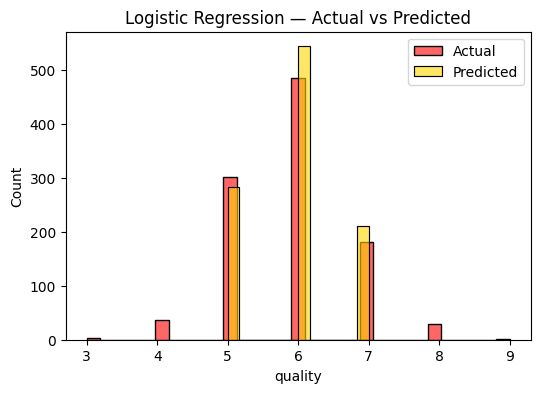


 Model: Logistic Regression
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        36
           5       0.59      0.55      0.57       302
           6       0.72      0.81      0.76       485
           7       0.86      1.00      0.92       181
           8       0.00      0.00      0.00        29
           9       0.00      0.00      0.00         1

    accuracy                           0.71      1038
   macro avg       0.31      0.34      0.32      1038
weighted avg       0.66      0.71      0.68      1038

Confusion Matrix:
 [[  0   0   1   3   0   0   0]
 [  0   0  22  14   0   0   0]
 [  0   0 166 136   0   0   0]
 [  0   0  94 391   0   0   0]
 [  0   0   0   0 181   0   0]
 [  0   0   0   0  29   0   0]
 [  0   0   0   0   1   0   0]]
------------------------------------------------------------
      Actual  Predicted
3279       6          6
3603       5          6
593 

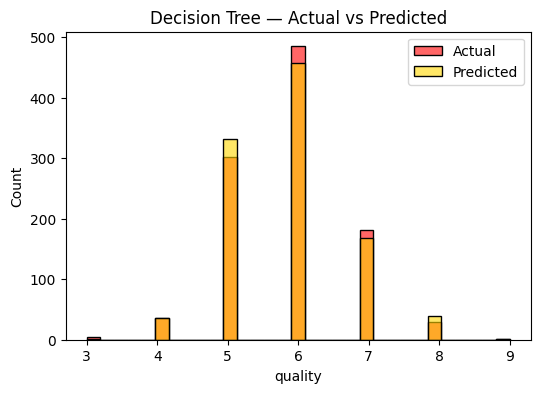


 Model: Decision Tree
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.14      0.14      0.14        36
           5       0.50      0.55      0.52       302
           6       0.70      0.66      0.68       485
           7       0.88      0.82      0.85       181
           8       0.20      0.28      0.23        29
           9       0.00      0.00      0.00         1

    accuracy                           0.63      1038
   macro avg       0.35      0.35      0.35      1038
weighted avg       0.64      0.63      0.63      1038

Confusion Matrix:
 [[  0   1   1   2   0   0   0]
 [  0   5  19  12   0   0   0]
 [  1  13 166 122   0   0   0]
 [  0  17 146 322   0   0   0]
 [  0   0   0   0 148  32   1]
 [  0   0   0   0  20   8   1]
 [  0   0   0   0   1   0   0]]
------------------------------------------------------------
      Actual  Predicted
3279       6          5
3603       5          6
593       

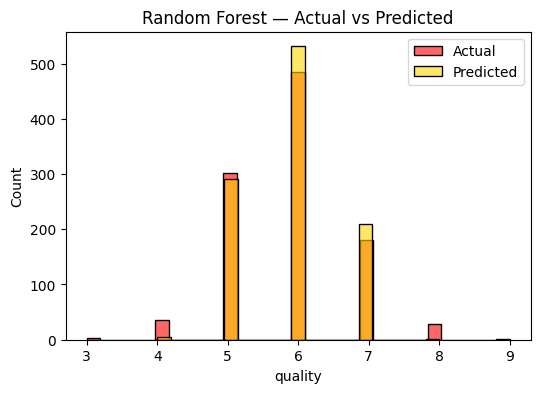


 Model: Random Forest
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.60      0.08      0.15        36
           5       0.61      0.59      0.60       302
           6       0.75      0.82      0.78       485
           7       0.86      0.99      0.92       181
           8       0.00      0.00      0.00        29
           9       0.00      0.00      0.00         1

    accuracy                           0.73      1038
   macro avg       0.40      0.36      0.35      1038
weighted avg       0.70      0.73      0.71      1038

Confusion Matrix:
 [[  0   0   1   3   0   0   0]
 [  0   3  26   7   0   0   0]
 [  0   1 178 123   0   0   0]
 [  0   1  86 398   0   0   0]
 [  0   0   0   0 180   1   0]
 [  0   0   0   0  29   0   0]
 [  0   0   0   0   1   0   0]]
------------------------------------------------------------
      Actual  Predicted
3279       6          6
3603       5          6
593       

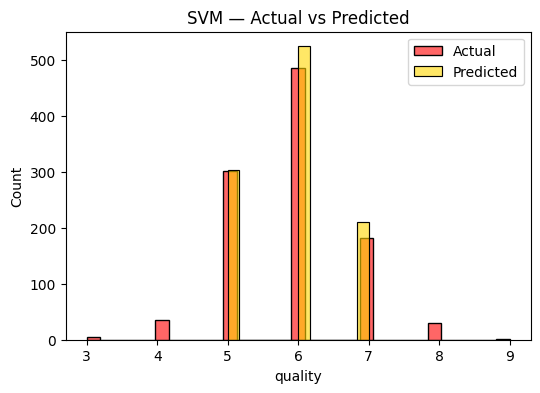


 Model: SVM
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        36
           5       0.63      0.63      0.63       302
           6       0.76      0.82      0.79       485
           7       0.86      1.00      0.92       181
           8       0.00      0.00      0.00        29
           9       0.00      0.00      0.00         1

    accuracy                           0.74      1038
   macro avg       0.32      0.35      0.33      1038
weighted avg       0.69      0.74      0.71      1038

Confusion Matrix:
 [[  0   0   1   3   0   0   0]
 [  0   0  24  12   0   0   0]
 [  0   0 190 112   0   0   0]
 [  0   0  88 397   0   0   0]
 [  0   0   0   0 181   0   0]
 [  0   0   0   0  29   0   0]
 [  0   0   0   0   1   0   0]]
------------------------------------------------------------
      Actual  Predicted
3279       6          6
3603       5          6
593        6        

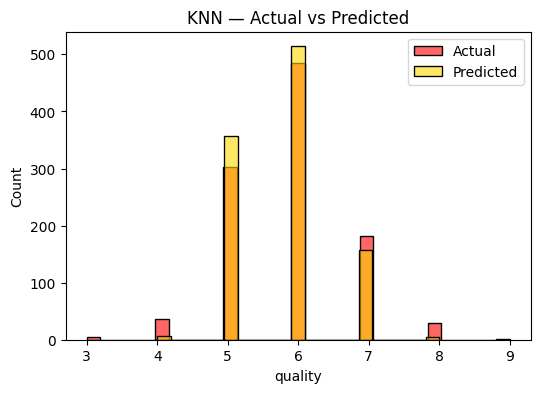


 Model: KNN
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.33      0.06      0.10        36
           5       0.54      0.64      0.58       302
           6       0.68      0.72      0.69       485
           7       0.80      0.69      0.74       181
           8       0.00      0.00      0.00        29
           9       0.00      0.00      0.00         1

    accuracy                           0.64      1038
   macro avg       0.33      0.30      0.30      1038
weighted avg       0.62      0.64      0.63      1038

Confusion Matrix:
 [[  0   0   2   2   0   0   0]
 [  0   2  24  10   0   0   0]
 [  0   2 192 108   0   0   0]
 [  0   2 128 347   8   0   0]
 [  0   0   9  43 125   4   0]
 [  0   0   2   4  23   0   0]
 [  0   0   0   0   1   0   0]]
------------------------------------------------------------
      Actual  Predicted
3279       6          6
3603       5          6
593        6        

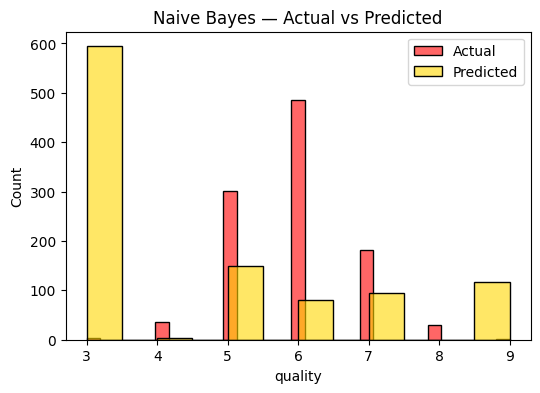


 Model: Naive Bayes
              precision    recall  f1-score   support

           3       0.01      1.00      0.01         4
           4       0.25      0.03      0.05        36
           5       0.52      0.25      0.34       302
           6       0.70      0.12      0.20       485
           7       0.86      0.45      0.59       181
           8       0.00      0.00      0.00        29
           9       0.01      1.00      0.02         1

    accuracy                           0.21      1038
   macro avg       0.34      0.41      0.17      1038
weighted avg       0.64      0.21      0.30      1038

Confusion Matrix:
 [[  4   0   0   0   0   0   0]
 [ 28   1   6   1   0   0   0]
 [201   1  77  23   0   0   0]
 [361   2  66  56   0   0   0]
 [  0   0   0   0  82   0  99]
 [  0   0   0   0  13   0  16]
 [  0   0   0   0   0   0   1]]
------------------------------------------------------------
      Actual  Predicted
3279       6          3
3603       5          6
593        6

,Model,Accuracy,Precision,Recall,F1-Score
3,SVM,0.739884,0.686022,0.739884,0.711454
2,Random Forest,0.731214,0.698452,0.731214,0.706358
0,Logistic Regression,0.710983,0.656073,0.710983,0.681234
1,Decision Tree,0.625241,0.637082,0.625241,0.630215
4,KNN,0.641618,0.622303,0.641618,0.626404
5,Naive Bayes,0.212909,0.636642,0.212909,0.297384


In [37]:
run_all_classifiers(x_train_transformed , x_test_transformed , y_train , y_test)